# About Dataset
## Context

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

## Content
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].


-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].


-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].


-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

## Acknowledgements
The original dataset can be found here. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.

We offer a comprehensive study of this corpus in the following paper. This work presents a number of statistics, studies and baseline results for several machine learning methods.

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.


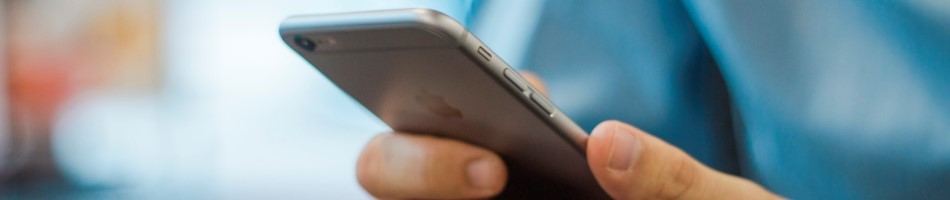

# Spam vs Ham Classification USING MACHINE LEARNING

## Importing Required Libraries

In [32]:
import pandas as pd
import numpy as np
import string

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.utils.multiclass import unique_labels

import chardet

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [4]:
# Importing Data

# Detect the encoding of the file
with open(r'spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
# Read the file using the detected encoding
df = pd.read_csv(r'spam.csv', encoding=result['encoding'])
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# EDA

In [5]:
df.shape

(5572, 5)

In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
# Drop irrelevant columns

df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [8]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [9]:
df.duplicated().sum()

403

In [10]:
# Drop Duplicates

df.drop_duplicates(inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [12]:
# Rename Columns

df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df.head(2)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [13]:
# Create columns of message_length 

df['message_length'] = df['message'].apply(len)
df.head()

,label,message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
df.describe(include='object')

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [15]:
# Statistical Summary

df.groupby('label').describe().T

label                         ham        spam
message_length count  4516.000000  653.000000
               mean     70.459256  137.891271
               std      56.358207   30.137753
               min       2.000000   13.000000
               25%      34.000000  132.000000
               50%      52.000000  149.000000
               75%      90.000000  157.000000
               max     910.000000  224.000000

### Insights:-

**(I) There are 4516 ham messages and 653 spam messages.**

**(II) On average, ham messages have a mean length of approximately 70.46 characters, while spam messages have a mean length of about 137.89 characters.** 

**(III) The shortest ham message contains 2 characters, while the shortest spam message contains 13 characters. The longest ham message has 910 characters, and the longest spam message has 224 characters.**

In [16]:
df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

# Data Visulaization

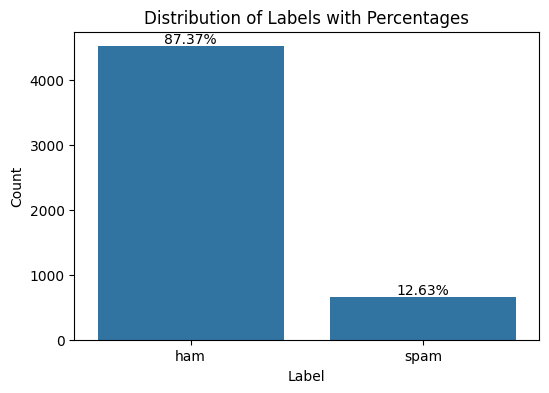

In [17]:
# Plot the value counts of 'label' with percentage inside bars
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
ax = sns.countplot(data=df, x='label')

# Calculate percentage and annotate bars with percentages
total = float(len(df['label']))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height/total)*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels with Percentages')

# Show the plot
plt.show()

**Dataset contains 87.37% of 'Ham' messages and 12.63% of 'Spam' Messages.**

# Ploting Distribution of Spam & Ham (Message Length)

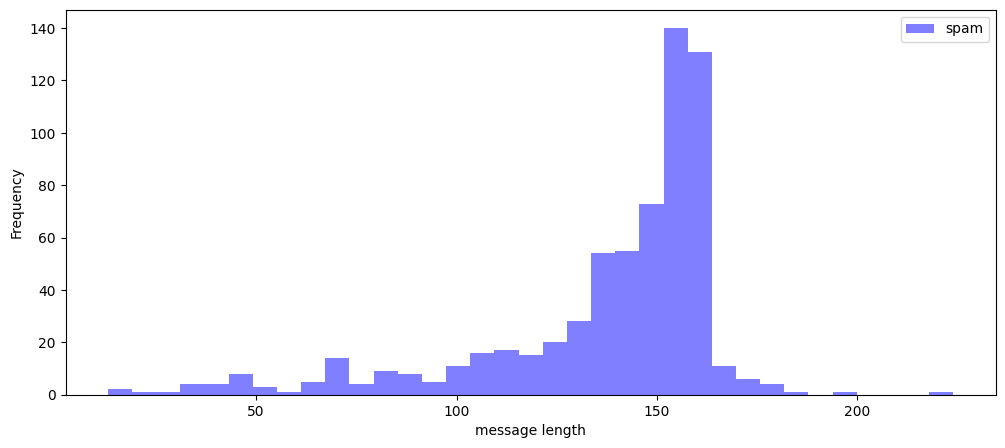

In [18]:
plt.figure(figsize=(12,5))
df[df['label']=='spam']['message_length'].plot(bins=35,kind='hist',color='blue',label='spam',alpha=0.5)
plt.legend()
plt.xlabel('message length')
plt.show()

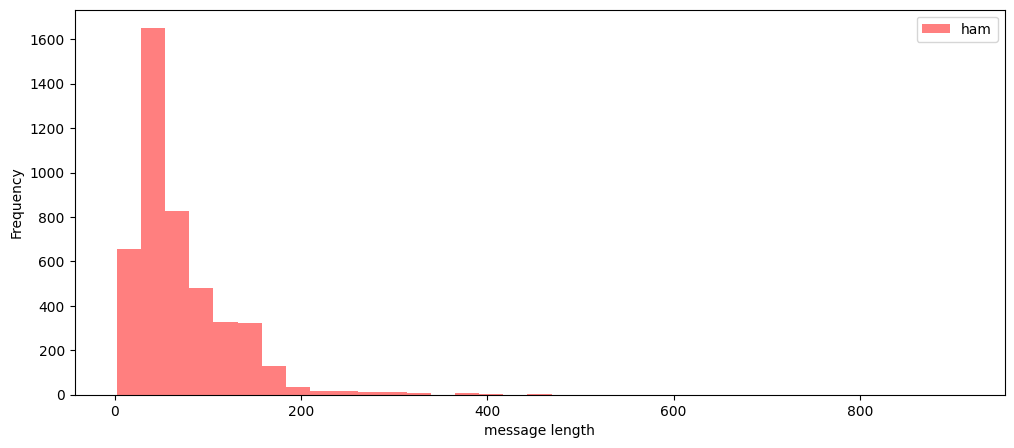

In [19]:
plt.figure(figsize=(12,5))
df[df['label']=='ham']['message_length'].plot(bins=35,kind='hist',color='red',label='ham',alpha=0.5)
plt.legend()
plt.xlabel('message length')
plt.show()

**The message length of spam is negatively skewed, while ham is positively skewed. This indicates that spam messages are typically longer than ham messages.**

# Convert Labels into numerical and save the copy of data

In [20]:
# Convert Labels into numerical

df.label.replace("ham",0,inplace = True)
df.label.replace("spam",1,inplace = True)

df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

**0 as 'Ham'**

**1 as 'Spam'**

In [21]:
#Save dataste copy 

df_copy = df.copy()

# Data Cleaning / Text Pre-Processing / Data Preparation

## (I) Remove HTML Tags

## (II) Remove Square Brackets

## (III) Remove URL's

## (IV) Remove Stop Words


In [25]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [26]:
# Removing the HTML Tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

# Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            if i.strip().isalpha():
                final_text.append(i.strip())
    return " ".join(final_text)

# Create Master Function 
def denoise_text(text):
    text = strip_html(text)
    text = remove_stopwords(text)
    text = remove_stopwords(text)
    return text

In [27]:
#Apply master function on message column

df['clean_message']=df['message'].apply(denoise_text)
df.head(2)

,label,message,message_length,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",111,Go jurong Available bugis n great world la e C...
1,0,Ok lar... Joking wif u oni...,29,Ok Joking wif u


## Word Cloud of 'Ham' & 'Spam' Messages

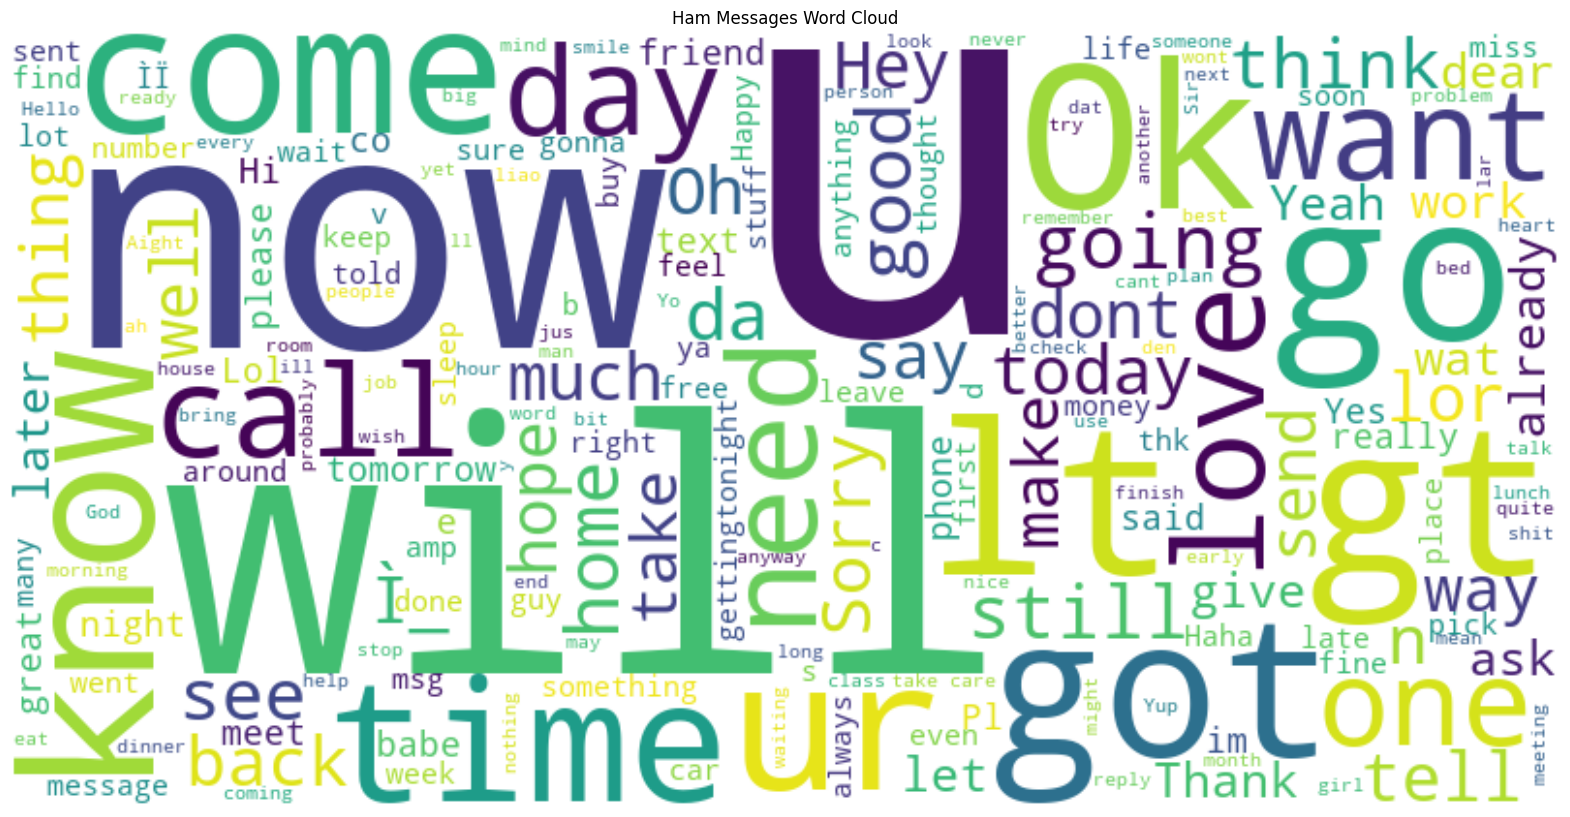

-------------------------------------------------------------------------------------------------------------------------------


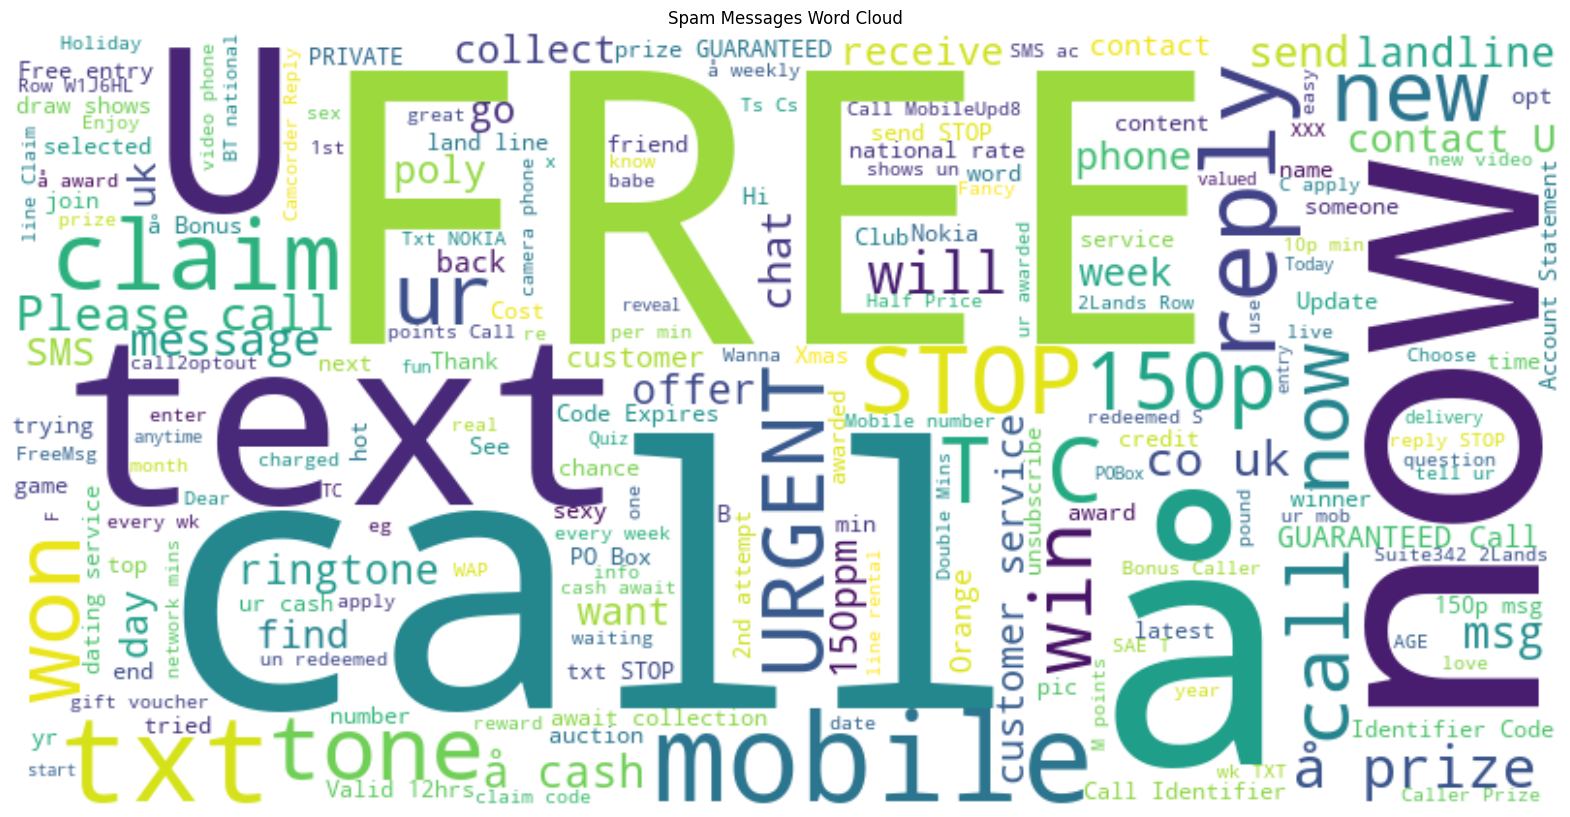

In [28]:
# Separate the messages based on categories
ham_messages = df[df['label'] == 0]['message']
spam_messages = df[df['label'] == 1]['message']

# Combine ham messages into a single string
ham_text = " ".join(ham_messages)

# Combine spam messages into a single string
spam_text = " ".join(spam_messages)

# Create word cloud for ham messages
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Create word cloud for spam messages
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Plot the ham word cloud
plt.figure(figsize=(20, 20))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')
plt.show()

print('-'*127)

# Plot the spam word cloud
plt.figure(figsize=(20, 20))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')
plt.show()

**Most frequently used words in 'Ham' messages are ['got', 'come', 'want', 'love', 'go', 'see', 'make', 'call', 'think', 'going']**

**Most frequently used words in 'Spam' messages are ['call', 'free', 'reply', 'stop', 'text', 'mobile', 'txt', 'prize', 'new', 'send']**

## (V) Lower Casing 

## (VI) Tokenization

## (VII) Stemming

**I used stemming over lemmatization for the text messages dataset because the part of speech is not very important in this case. There are many frequently used words like "go" and "going" that need stemming. I prefer to use the Snowball stemmer because it is more effective than the Porter stemmer and produces better results. Stemming is also faster than lemmatization.**



In [33]:
# Initialize Snowball Stemmer
snowball_stemmer = SnowballStemmer('english')

# Preprocessing
preprocessed_messages = []

for _, row in df.iterrows():
    review = re.sub('[^a-zA-Z]', ' ', row['message'])
    review = review.lower()
    tokens = word_tokenize(review)
    tokens = [snowball_stemmer.stem(word) for word in tokens if not word in stopwords.words('english')]
    preprocessed_review = ' '.join(tokens)
    preprocessed_messages.append(preprocessed_review)

# Add preprocessed messages back to the DataFrame
df['clean_message'] = df['clean_message']

# Display the preprocessed DataFrame
df

,label,message,message_length,clean_message,clean_message_length
0,0,"Go until jurong point, crazy.. Available only ...",111,Go jurong Available bugis n great world la e C...,59
1,0,Ok lar... Joking wif u oni...,29,Ok Joking wif u,15
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry wkly comp win FA Cup final tkts May...,78
3,0,U dun say so early hor... U c already then say...,49,U dun say early U c already,27
4,0,"Nah I don't think he goes to usf, he lives aro...",61,Nah think goes lives around though,34
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,time tried contact U Pound claim call per,41
5568,0,Will Ì_ b going to esplanade fr home?,37,b going esplanade fr,20
5569,0,"Pity, * was in mood for that. So...any other s...",57,mood,4
5570,0,The guy did some bitching but I acted like i'd...,125,guy bitching acted like interested buying some...,79


In [30]:
# Add a new column 'clean_message_length'
df['clean_message_length'] = df['clean_message'].apply(len)

# Display the updated DataFrame
df

,label,message,message_length,clean_message,clean_message_length
0,0,"Go until jurong point, crazy.. Available only ...",111,Go jurong Available bugis n great world la e C...,59
1,0,Ok lar... Joking wif u oni...,29,Ok Joking wif u,15
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry wkly comp win FA Cup final tkts May...,78
3,0,U dun say so early hor... U c already then say...,49,U dun say early U c already,27
4,0,"Nah I don't think he goes to usf, he lives aro...",61,Nah think goes lives around though,34
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,time tried contact U Pound claim call per,41
5568,0,Will Ì_ b going to esplanade fr home?,37,b going esplanade fr,20
5569,0,"Pity, * was in mood for that. So...any other s...",57,mood,4
5570,0,The guy did some bitching but I acted like i'd...,125,guy bitching acted like interested buying some...,79


In [31]:
# Creating independent & dependent variable 

X = df['clean_message']
y = df['label']

# Text Vectorization Using TF-IDF

**We perform text vectorization on both the train and test sets because when evaluating the model on the test data, it needs to have the same number of columns as the training data.**

In [34]:
# Convert text into vectors using TF-IDF

tf = TfidfVectorizer()

tfTrainReviews = tf.fit_transform(X)

tfTrainReviews

<5169x6012 sparse matrix of type '<class 'numpy.float64'>'
	with 30663 stored elements in Compressed Sparse Row format>

In [35]:
tfTrainReviews.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
# Get the feature names (words)
feature_names = tf.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfTrainReviews.toarray(), columns=feature_names)

# Display the TF-IDF features
tfidf_df.head()

,aa,aah,aaniye,aaooooright,abdomen,abi,ability,abiola,abj,able,...,zhong,zindgi,zoe,zoom,zouk,zyada,åð,åòharry,åôrents,ìï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**6012 features were created using TF-IDF vectorization.**

**Text vectorization was successfully completed.**

# Train Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(tfTrainReviews, y, test_size = 0.20, random_state = 42)

In [38]:
print("X_train shape: {}\nX_test shape: {}\nY_train shape: {}\nY_test shape: {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train shape: (4135, 6012)
X_test shape: (1034, 6012)
Y_train shape: (4135,)
Y_test shape: (1034,)


# Model Building

In [39]:
# Set random state and n_jobs
random_state = 42
n_jobs = -1

# Initialize a list of classifiers with specified parameters
classifiers = [
    LogisticRegression(random_state=random_state, n_jobs=n_jobs),
    DecisionTreeClassifier(random_state=random_state),
    KNeighborsClassifier(n_jobs=n_jobs),
    MultinomialNB(),
    AdaBoostClassifier(random_state=random_state),
    GradientBoostingClassifier(random_state=random_state),
    RandomForestClassifier(random_state=random_state, n_jobs=n_jobs),
    XGBClassifier(random_state=random_state, n_jobs=n_jobs),
    SVC(random_state=random_state)
]

results = []

# Loop through each classifier
for classifier in classifiers:
    start_time = time.time()
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = classifier.predict(X_train)
    
    # Predict on the test set
    y_test_pred = classifier.predict(X_test)
    
    # Calculate performance metrics for training set
    train_accuracy = np.mean(y_train_pred == y_train)
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    train_precision = train_report['weighted avg']['precision']
    train_recall = train_report['weighted avg']['recall']
    train_f1 = train_report['weighted avg']['f1-score']
    train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)
    
    # Calculate performance metrics for test set
    test_accuracy = np.mean(y_test_pred == y_test)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)
    test_precision = test_report['weighted avg']['precision']
    test_recall = test_report['weighted avg']['recall']
    test_f1 = test_report['weighted avg']['f1-score']
    test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
    
    # Calculate the time taken for training
    build_time = time.time() - start_time
    
    # Append results to the list
    results.append([classifier.__class__.__name__, train_accuracy, train_precision, train_recall, train_f1, train_balanced_acc, 
                    test_accuracy, test_precision, test_recall, test_f1, test_balanced_acc, build_time])

# Create a DataFrame from the results
columns = ["Algorithm", 
           "Train Accuracy", "Train Precision", "Train Recall", "Train F1-score", "Train Balanced Accuracy",
           "Test Accuracy", "Test Precision", "Test Recall", "Test F1-score", "Test Balanced Accuracy",
           "Building Time (s)"]

results_df = pd.DataFrame(results, columns=columns)

# Print the results
print("Model Performance on Training and Test Sets")
results_df

Model Performance on Training and Test Sets


,Algorithm,Train Accuracy,Train Precision,Train Recall,Train F1-score,Train Balanced Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1-score,Test Balanced Accuracy,Building Time (s)
0,LogisticRegression,0.954534,0.954992,0.954534,0.950661,0.825117,0.934236,0.933117,0.934236,0.927986,0.788604,2.355302
1,DecisionTreeClassifier,0.999516,0.999517,0.999516,0.999516,0.998031,0.937137,0.936958,0.937137,0.937046,0.868209,0.852236
2,KNeighborsClassifier,0.925272,0.931139,0.925272,0.910468,0.695866,0.906190,0.915418,0.906190,0.885042,0.665517,0.926853
3,MultinomialNB,0.961064,0.962719,0.961064,0.957821,0.841535,0.951644,0.953593,0.951644,0.947484,0.830472,0.024674
4,AdaBoostClassifier,0.969045,0.968535,0.969045,0.967859,0.893483,0.949710,0.948035,0.949710,0.947596,0.858206,2.621881
5,GradientBoostingClassifier,0.968319,0.968925,0.968319,0.966438,0.875295,0.953578,0.953566,0.953578,0.950564,0.848912,5.868563
6,RandomForestClassifier,0.999516,0.999517,0.999516,0.999516,0.998031,0.965184,0.965778,0.965184,0.963332,0.881634,2.395192
7,XGBClassifier,0.984281,0.984511,0.984281,0.983829,0.936870,0.963250,0.962392,0.963250,0.962340,0.900710,0.689158
8,SVC,0.994438,0.994458,0.994438,0.994387,0.978209,0.964217,0.964258,0.964217,0.962516,0.883957,1.912124


**The Random Forest Classifier is a good choice because it works well on both the training and test sets. It has high accuracy, precision, recall, F1-score, and balanced accuracy. This means that it is accurate, it predicts the positive cases correctly, it predicts the negative cases correctly, it has a good balance between precision and recall, and it works well with imbalanced data.**

## Build Random Forest Classifier

In [40]:
# Initialize Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the classifier
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [42]:
# Predict on the train set
y_train_pred = random_forest_classifier.predict(X_train)

# Predict on the test set
y_test_pred = random_forest_classifier.predict(X_test)

# Calculate performance metrics for training set
train_report = classification_report(y_train, y_train_pred, output_dict=True)
train_accuracy = train_report['accuracy']
train_precision = train_report['weighted avg']['precision']
train_recall = train_report['weighted avg']['recall']
train_f1 = train_report['weighted avg']['f1-score']
train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)

# Calculate performance metrics for test set
test_report = classification_report(y_test, y_test_pred, output_dict=True)
test_accuracy = test_report['accuracy']
test_precision = test_report['weighted avg']['precision']
test_recall = test_report['weighted avg']['recall']
test_f1 = test_report['weighted avg']['f1-score']
test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Balanced Accuracy'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1, train_balanced_acc],
    'Test': [test_accuracy, test_precision, test_recall, test_f1, test_balanced_acc]
})

# Print the results DataFrame
results_df

,Metric,Train,Test
0,Accuracy,0.999516,0.965184
1,Precision,0.999517,0.965778
2,Recall,0.999516,0.965184
3,F1-score,0.999516,0.963332
4,Balanced Accuracy,0.998031,0.881634


**The Random Forest Classifier performed very well on the training set, with near-perfect accuracy, precision, recall, and F1-score. Although its performance on the test set was slightly lower, it still maintained a high level of accuracy and generalization. This suggests that it has strong predictive capabilities and is robust to overfitting. It also does not require hyperparameter tuning.**

# Model evaluation


## Classification Report

In [43]:
# Generate classification report for training data
train_report = classification_report(y_train, y_train_pred)
print("Classification Report for Training Data:\n", train_report)

print('-'*127)

# Generate classification report for test data
test_report = classification_report(y_test, y_test_pred)
print("Classification Report for Test Data:\n", test_report)

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3627
           1       1.00      1.00      1.00       508

    accuracy                           1.00      4135
   macro avg       1.00      1.00      1.00      4135
weighted avg       1.00      1.00      1.00      4135

-------------------------------------------------------------------------------------------------------------------------------
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.98      0.77      0.86       145

    accuracy                           0.97      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034



**According to the problem statement, a false positive is more risky than a false negative. This is because a false positive occurs when the model predicts that an email is spam, when it is actually not spam. This can lead to important emails being marked as spam and deleted, which can be a loss of important information.**

**Precision is a metric that measures the percentage of emails that are correctly classified as spam. In the classification report, it looks like both the train and test data have high precision values, which indicates that the model is performing well at classifying spam emails.**

## Confusion Matrix

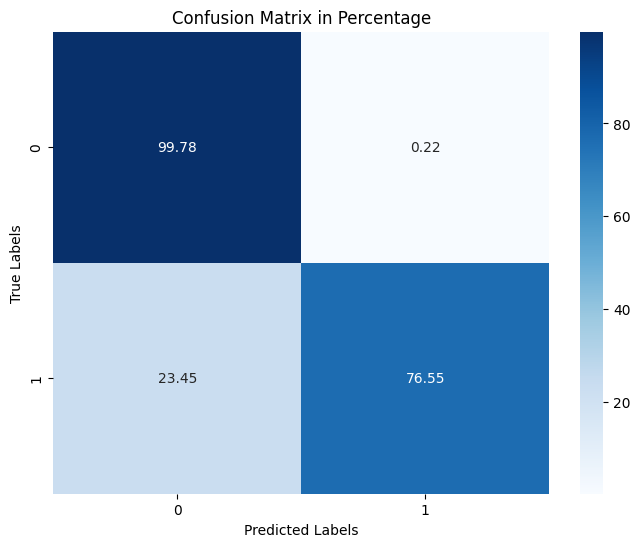

In [44]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Calculate percentages
cm_percent = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100

# Get class labels
class_labels = unique_labels(y_test, y_test_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix in Percentage')
plt.show()

**The false negative percentage is less than the false positive percentage because the dataset contains a majority of data from the "ham" category in the target variable.**

# Cross Validation

In [45]:
#cross validation of Recall

from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_forest_classifier, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.95888755 0.96130593 0.9637243  0.96614268 0.96735187]

Mean Accuracy Score: 0.9634824667472792


In [46]:
#cross validation of Recall

scores = cross_val_score(random_forest_classifier, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.95888755 0.96130593 0.9637243  0.96614268 0.96735187]

Mean Accuracy Score: 0.9634824667472792


# Save Model to System

In [47]:
import joblib

model = random_forest_classifier

joblib.dump(model, 'Ham_Vs_Spam_Classifier.pkl')

['Ham_Vs_Spam_Classifier.pkl']

# SMS Spam Classifier Project Report
## Introduction
This project aims to develop a spam classifier using Natural Language Processing (NLP) and Machine Learning techniques. The goal is to accurately differentiate between spam and ham (non-spam) messages in the SMS text data.

## Methodology
### 1. Data Acquisition and Preprocessing
* The SMS Spam Collection Dataset from Kaggle was used for this project.


* The dataset contains 5,572 messages with 5 columns.


* Irrelevant columns (Unnamed: 2, Unnamed: 3, Unnamed: 4) were removed.


* Duplicates (403) were dropped from the dataset.


#### 2. Data Exploration and Analysis
* The dataset contained no null values, ensuring data integrity.


* A new column 'message_length' was added to represent the length of each message.


* Statistical summaries revealed insights on message length distribution and other aspects of the data.


* The value counts of target categories ('ham' and 'spam') were calculated.


### 3. Data Visualization

* The distribution of target categories showed that 87.37% were 'ham' messages and 12.63% were 'spam' messages.


* Histograms and box plots revealed the skewness of message length in both categories.


### 4. Data Preprocessing
* Text preprocessing techniques such as lower casing, tokenization, and stemming (using Snowball Stemmer) were applied to the messages.


* Stop words, HTML tags, square brackets, and URLs were removed to clean the text.


### 5. Text Vectorization Using TF-IDF
* TF-IDF vectorization was performed on both the training and test sets to convert text data into numerical form.


* A total of 6012 features were generated using TF-IDF vectorization.



### 6. Train-Test Split
* The data was split into training and test sets in a 80:20 ratio.


* The dimensions of the resulting sets were displayed.
### 7. Model Building and Evaluation


* Nine different classifiers were trained and evaluated using performance metrics.


* Random Forest Classifier demonstrated excellent performance with high accuracy, precision, recall, F1-score, and balanced accuracy.


### 8. Model Evaluation
* Classification reports for both the training and test data were generated, providing insights into precision, recall, and F1-score.


* The confusion matrix in percentage form illustrated the distribution of false positives and false negatives.


### 9. Cross Validation
* Cross-validation was performed to assess model performance and variance.


* The mean accuracy score of the Random Forest Classifier was calculated.
### 10. Model Saving

* The trained Random Forest Classifier model was saved using the joblib library.


## Conclusion
In conclusion, the developed SMS spam classifier successfully differentiates between spam and ham messages with high accuracy and precision. The Random Forest Classifier emerged as the best-performing model, providing consistent results on both training and test data. This project showcases the effectiveness of NLP techniques and machine learning algorithms in tackling text classification tasks.

## Future Work
* Further hyperparameter tuning could be performed to optimize model performance.


* Ensemble methods or deep learning architectures could be explored for potential improvements.


* The model could be integrated into a messaging platform or email client for practical use.